# Project | Natural Language Processing
### News Headline: Real or Fake News

In [1]:
# conda activate fakemodel
# python -m ipykernel install --user --name fakemodel --display-name "Python (fakemodel)"
%pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
%conda install pandas

Channels:
 - defaults
 - conda-forge
 - nvidia
 - pytorch
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy seaborn transformers

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pandas scikit-learn matplotlib seaborn
%pip install transformers datasets
%pip install torch tqdm
%pip numpy seaborn transformers
import pandas as pd
import sklearn
import transformers



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "numpy"



Note: you may need to restart the kernel to use updated packages.


c:\Users\happy\anaconda3\envs\fakemodel\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Read Data


In [9]:
%pip install transformers datasets scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
OUTPUT_PATH = 'dataset/predicted_validation_data_from_XGBoost.csv'

In [87]:

## Read training data
train_path = r"dataset\data.csv"

df = pd.read_csv(train_path)

# Look at the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check the distribution of labels
print(df['label'].value_counts())

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
label      0
title      0
text       0
subject    0
date

## Split

In [88]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [89]:
## Read validation data
val_df = pd.read_csv(r"dataset\validation_data.csv")
val_df.head(10)

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"
5,2,Flames raced along train at west London statio...,LONDON (Reuters) - Flames engulfed one carriag...,worldnews,"September 15, 2017"
6,2,London police advise people to avoid area near...,LONDON (Reuters) - British police on Friday ad...,worldnews,"September 15, 2017"
7,2,London ambulance service sends hazardous area ...,LONDON (Reuters) - London s ambulance service ...,worldnews,"September 15, 2017"
8,2,Witness says injured in stampede at London sta...,LONDON (Reuters) - A woman at London s Parsons...,worldnews,"September 15, 2017"
9,2,UK says world will stand together against Nort...,LONDON (Reuters) - Britain said on Friday the ...,worldnews,"September 15, 2017"


## Data Preprocessing

In [90]:
import re
import string

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply to title and text, combine them
for df_ in [train_df, test_df]:
    df_['cleaned'] = (df_['title'] + ' ' + df_['text']).apply(clean_text)




In [91]:
whole_df = pd.read_csv(train_path)
whole_df['cleaned'] = (whole_df['title'] + ' ' + whole_df['text']).apply(clean_text)

## TD-IDF + Cross-validation + Evaluation for 4 models


In [92]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


trial to see the effect of all data sets for confusion matrix


Training and evaluating: Logistic Regression
Cross-Validation Accuracy: 0.9407
Cross-Validation F1 Score: 0.9417
Accuracy: 0.9407 ± 0.0025
F1 Score: 0.9417 ± 0.0024
Test Accuracy: 0.9832
F1 Score: 0.9832
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3989
           1       0.98      0.99      0.98      4000

    accuracy                           0.98      7989
   macro avg       0.98      0.98      0.98      7989
weighted avg       0.98      0.98      0.98      7989

Whole data.csv Test Accuracy: 0.9903
Whole data.csv F1 Score: 0.9903
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19943
           1       0.99      0.99      0.99     19999

    accuracy                           0.99     39942
   macro avg       0.99      0.99      0.99     39942
weighted avg       0.99      0.99      0.99     39942

Test Accuracy: 0.9832
Test F1 Score: 0.9832

Classification Report:
    

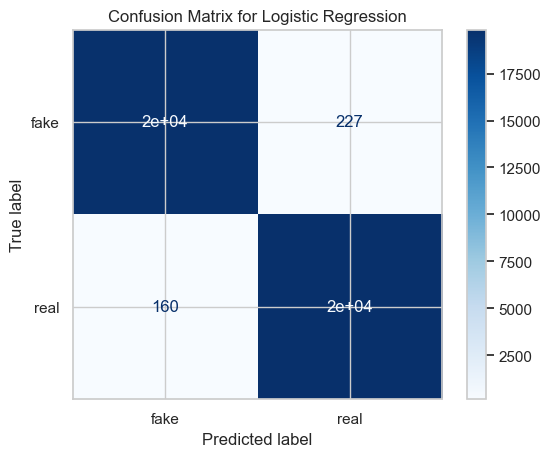


Training and evaluating: Naive Bayes
Cross-Validation Accuracy: 0.9369
Cross-Validation F1 Score: 0.9362
Accuracy: 0.9369 ± 0.0029
F1 Score: 0.9362 ± 0.0029
Test Accuracy: 0.9357
F1 Score: 0.9356
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3989
           1       0.92      0.96      0.94      4000

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989

Whole data.csv Test Accuracy: 0.9446
Whole data.csv F1 Score: 0.9446
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19943
           1       0.93      0.96      0.95     19999

    accuracy                           0.94     39942
   macro avg       0.95      0.94      0.94     39942
weighted avg       0.95      0.94      0.94     39942

Test Accuracy: 0.9357
Test F1 Score: 0.9356

Classification Report:
            

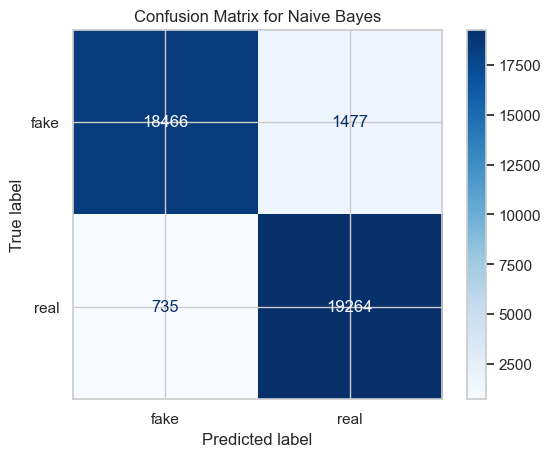


Training and evaluating: Random Forest
Cross-Validation Accuracy: 0.9350
Cross-Validation F1 Score: 0.9366
Accuracy: 0.9350 ± 0.0017
F1 Score: 0.9366 ± 0.0017
Test Accuracy: 0.9872
F1 Score: 0.9872
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3989
           1       0.99      0.99      0.99      4000

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989

Whole data.csv Test Accuracy: 0.9974
Whole data.csv F1 Score: 0.9974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19943
           1       1.00      1.00      1.00     19999

    accuracy                           1.00     39942
   macro avg       1.00      1.00      1.00     39942
weighted avg       1.00      1.00      1.00     39942

Test Accuracy: 0.9872
Test F1 Score: 0.9872

Classification Report:
          

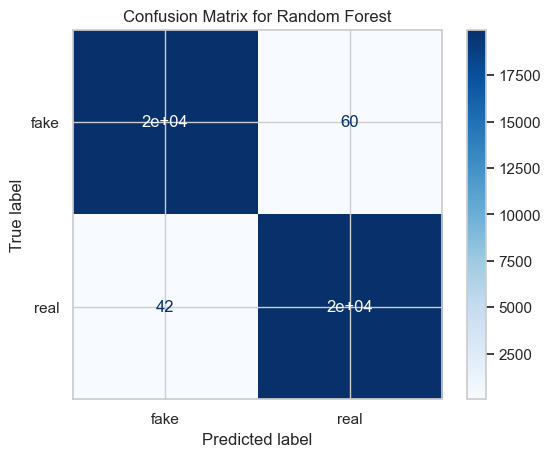


Training and evaluating: XGBoost
Cross-Validation Accuracy: 0.9078
Cross-Validation F1 Score: 0.9134
Accuracy: 0.9078 ± 0.0025
F1 Score: 0.9134 ± 0.0022
Test Accuracy: 0.9979
F1 Score: 0.9979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989

Whole data.csv Test Accuracy: 0.9995
Whole data.csv F1 Score: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19943
           1       1.00      1.00      1.00     19999

    accuracy                           1.00     39942
   macro avg       1.00      1.00      1.00     39942
weighted avg       1.00      1.00      1.00     39942

Test Accuracy: 0.9979
Test F1 Score: 0.9979

Classification Report:
               p

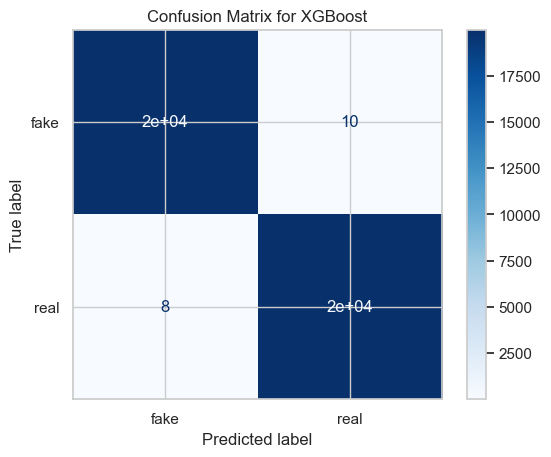


📊 Model Comparison:
                 Model  Cross-Validation Accuracy  \
0  Logistic Regression                   0.940725   
1          Naive Bayes                   0.936907   
2        Random Forest                   0.934998   
3              XGBoost                   0.907833   

   Cross-Validation Accuracy std  Cross-Validation F1 Score  \
0                       0.002499                   0.941711   
1                       0.002869                   0.936222   
2                       0.001748                   0.936567   
3                       0.002540                   0.913430   

   Cross-Validation F1 Score std  Test Accuracy  F1 Score  \
0                       0.002397       0.983227  0.983227   
1                       0.002905       0.935662  0.935630   
2                       0.001677       0.987232  0.987232   
3                       0.002206       0.997872  0.997872   

   Whole data Test Accuracy  Whole Score  
0                  0.990311     0.990311  
1    

Text(0.5, 1.0, 'Model Comparison (F1 Score)')

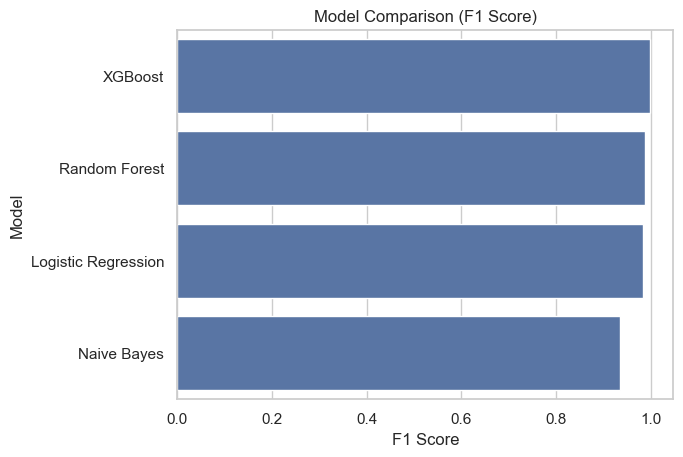

In [97]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
}

# Store evaluation results
results = []

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', model)
    ])
    
    # Cross-validation (5-fold)
    # scores = cross_val_score(pipe, train_df['cleaned'], train_df['label'], cv=5, scoring='accuracy')
    # print(f"Cross-Validation Accuracy: {scores.mean():.4f}")
    # Calculate cross-validation scores using the pipeline (pipe) so text is vectorized
    scoring = ['accuracy', 'f1']
    scores = cross_validate(pipe, train_df['title'], train_df['label'], cv=5, scoring=scoring)

    # # Print mean scores
    print(f"Cross-Validation Accuracy: {scores['test_accuracy'].mean():.4f}")
    print(f"Cross-Validation F1 Score: {scores['test_f1'].mean():.4f}")

    # Compute and print mean and std deviation
    acc_mean = np.mean(scores['test_accuracy'])
    acc_std = np.std(scores['test_accuracy'])
    f1_mean = np.mean(scores['test_f1'])
    f1_std = np.std(scores['test_f1'])

    print(f"Accuracy: {acc_mean:.4f} ± {acc_std:.4f}")
    print(f"F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")

    
    # Fit and Predict on test set
    pipe.fit(train_df['cleaned'], train_df['label'])
    preds = pipe.predict(test_df['cleaned'])

      # Fit and Predict on whole test set
    whole_preds = pipe.predict(whole_df['cleaned'])

    # # Evaluate
    acc = accuracy_score(test_df['label'], preds)
    f1 = f1_score(test_df['label'], preds, average='weighted')
    print(f"Test Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(test_df['label'], preds))

    # # Evaluate whole_data
    whole_acc = accuracy_score(whole_df['label'], whole_preds)
    whole_f1 = f1_score(whole_df['label'], whole_preds, average='weighted')
    print(f"Whole data.csv Test Accuracy: {whole_acc:.4f}")
    print(f"Whole data.csv F1 Score: {whole_f1:.4f}")
    print(classification_report(whole_df['label'], whole_preds))
    # Evaluate
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

    # Print metrics
    print(f"Test Accuracy: {accuracy_score(test_df['label'], preds):.4f}")
    print(f"Test F1 Score: {f1_score(test_df['label'], preds, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(test_df['label'], preds))
    # Print metrics
    print(f"Whole data Test Accuracy: {accuracy_score(whole_df['label'], whole_preds):.4f}")
    print(f"Whole data Test F1 Score: {f1_score(whole_df['label'], whole_preds, average='weighted'):.4f}")
    print("\nWhole data Classification Report:\n", classification_report(whole_df['label'], whole_preds))

    # # Confusion Matrix
    # cm = confusion_matrix(test_df['label'], preds)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    # disp.plot(cmap='Blues')
    # plt.title(f"Confusion Matrix for {name}")
    # plt.show()
    

    # # Confusion Matrix
    # cm = confusion_matrix(test_df['label'], preds)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
    # disp.plot(cmap='Blues')
    # plt.title(f"Confusion Matrix for {name}")
    # plt.show()

        # Confusion Matrix
    cm = confusion_matrix(whole_df['label'], whole_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    # Save results
    results.append({
        "Model": name,
        "Cross-Validation Accuracy": float(f"{acc_mean:.6f}"),
        "Cross-Validation Accuracy std": float(f"{acc_std:.6f}"),
        "Cross-Validation F1 Score": float(f"{f1_mean:.6f}"),
        "Cross-Validation F1 Score std": float(f"{f1_std:.6f}"),
        "Test Accuracy": acc,
        "F1 Score": f1,
        "Whole data Test Accuracy": whole_acc,
        "Whole Score": whole_f1
    })

# Compare all models
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df)

# Plot results
sns.barplot(x="F1 Score", y="Model", data=results_df.sort_values(by="F1 Score", ascending=False))
plt.title("Model Comparison (F1 Score)")

20K data for confusion matrix will confuse you more! It doesnt add value as you need a separate set of data for train and test. 'Can't use all 20K for test because training was done on 80% of it.

Proper plotting below


Training and evaluating: Logistic Regression
Cross-Validation Accuracy: 0.9407
Cross-Validation F1 Score: 0.9417
Accuracy: 0.9407 ± 0.0025
F1 Score: 0.9417 ± 0.0024
Test Accuracy: 0.9832
F1 Score: 0.9832
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3989
           1       0.98      0.99      0.98      4000

    accuracy                           0.98      7989
   macro avg       0.98      0.98      0.98      7989
weighted avg       0.98      0.98      0.98      7989

Test Accuracy: 0.9832
Test F1 Score: 0.9832

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3989
           1       0.98      0.99      0.98      4000

    accuracy                           0.98      7989
   macro avg       0.98      0.98      0.98      7989
weighted avg       0.98      0.98      0.98      7989



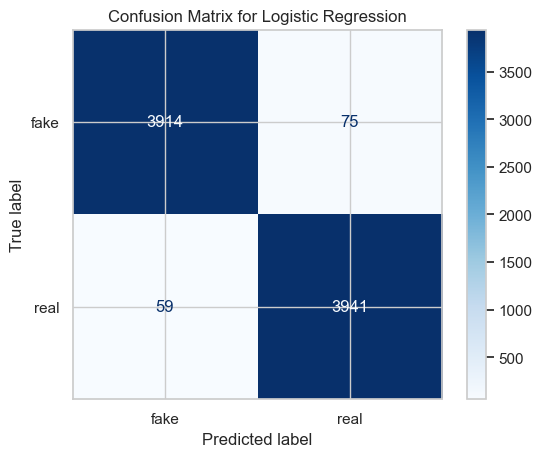


Training and evaluating: Naive Bayes
Cross-Validation Accuracy: 0.9369
Cross-Validation F1 Score: 0.9362
Accuracy: 0.9369 ± 0.0029
F1 Score: 0.9362 ± 0.0029
Test Accuracy: 0.9357
F1 Score: 0.9356
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3989
           1       0.92      0.96      0.94      4000

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989

Test Accuracy: 0.9357
Test F1 Score: 0.9356

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      3989
           1       0.92      0.96      0.94      4000

    accuracy                           0.94      7989
   macro avg       0.94      0.94      0.94      7989
weighted avg       0.94      0.94      0.94      7989



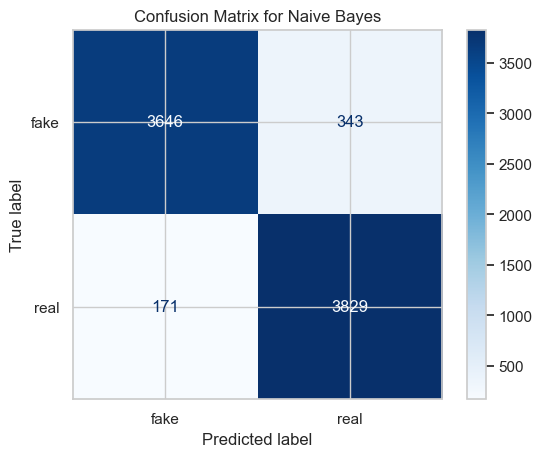


Training and evaluating: Random Forest
Cross-Validation Accuracy: 0.9352
Cross-Validation F1 Score: 0.9369
Accuracy: 0.9352 ± 0.0022
F1 Score: 0.9369 ± 0.0022
Test Accuracy: 0.9871
F1 Score: 0.9871
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3989
           1       0.99      0.99      0.99      4000

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989

Test Accuracy: 0.9871
Test F1 Score: 0.9871

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3989
           1       0.99      0.99      0.99      4000

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989



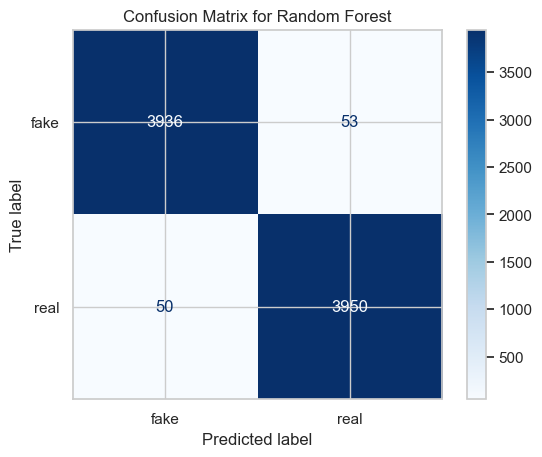


Training and evaluating: XGBoost
Cross-Validation Accuracy: 0.9078
Cross-Validation F1 Score: 0.9134
Accuracy: 0.9078 ± 0.0025
F1 Score: 0.9134 ± 0.0022
Test Accuracy: 0.9979
F1 Score: 0.9979
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989

Test Accuracy: 0.9979
Test F1 Score: 0.9979

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



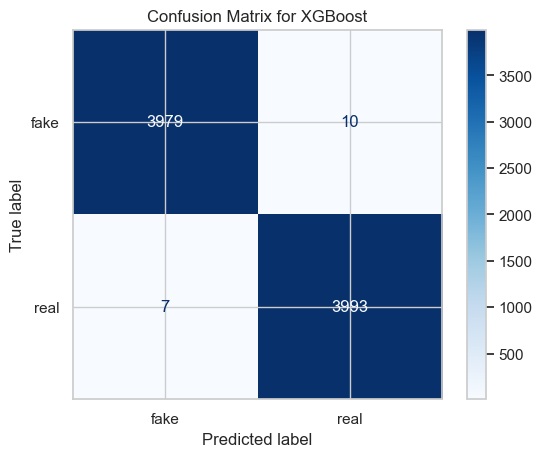


📊 Model Comparison:
                 Model  Cross-Validation Accuracy  \
0  Logistic Regression                   0.940725   
1          Naive Bayes                   0.936907   
2        Random Forest                   0.935217   
3              XGBoost                   0.907833   

   Cross-Validation Accuracy std  Cross-Validation F1 Score  \
0                       0.002499                   0.941711   
1                       0.002869                   0.936222   
2                       0.002228                   0.936905   
3                       0.002540                   0.913430   

   Cross-Validation F1 Score std  Test Accuracy  F1 Score  
0                       0.002397       0.983227  0.983227  
1                       0.002905       0.935662  0.935630  
2                       0.002194       0.987107  0.987107  
3                       0.002206       0.997872  0.997872  


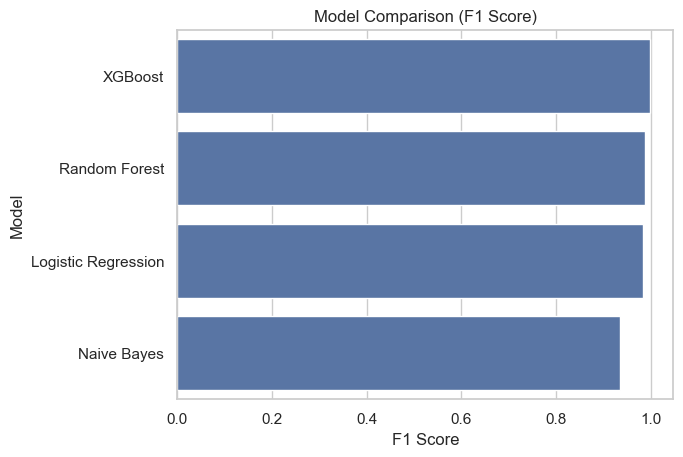

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
}

# Store evaluation results
results = []

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', model)
    ])
    
    # Cross-validation (5-fold)
    # scores = cross_val_score(pipe, train_df['cleaned'], train_df['label'], cv=5, scoring='accuracy')
    # print(f"Cross-Validation Accuracy: {scores.mean():.4f}")
    # Calculate cross-validation scores using the pipeline (pipe) so text is vectorized
    scoring = ['accuracy', 'f1']
    scores = cross_validate(pipe, train_df['title'], train_df['label'], cv=5, scoring=scoring)

    # # Print mean scores
    print(f"Cross-Validation Accuracy: {scores['test_accuracy'].mean():.4f}")
    print(f"Cross-Validation F1 Score: {scores['test_f1'].mean():.4f}")
    print(f"Recall:   {scores['test_recall'].mean():.4f}")
    
    # Compute and print mean and std deviation
    acc_mean = np.mean(scores['test_accuracy'])
    acc_std = np.std(scores['test_accuracy'])
    f1_mean = np.mean(scores['test_f1'])
    f1_std = np.std(scores['test_f1'])

    print(f"Accuracy: {acc_mean:.4f} ± {acc_std:.4f}")
    print(f"F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")

    
    # Fit and Predict on test set
    pipe.fit(train_df['cleaned'], train_df['label'])
    preds = pipe.predict(test_df['cleaned'])

    # # Evaluate
    acc = accuracy_score(test_df['label'], preds)
    f1 = f1_score(test_df['label'], preds, average='weighted')
    print(f"Test Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(test_df['label'], preds))

    # Evaluate
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

    # Print metrics
    print(f"Test Accuracy: {accuracy_score(test_df['label'], preds):.4f}")
    print(f"Test F1 Score: {f1_score(test_df['label'], preds, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(test_df['label'], preds))


    # # Confusion Matrix
    # cm = confusion_matrix(test_df['label'], preds)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
    # disp.plot(cmap='Blues')
    # plt.title(f"Confusion Matrix for {name}")
    # plt.show()
    

    # Confusion Matrix
    cm = confusion_matrix(test_df['label'], preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    # Save results
    results.append({
        "Model": name,
        "Cross-Validation Accuracy": float(f"{acc_mean:.6f}"),
        "Cross-Validation Accuracy std": float(f"{acc_std:.6f}"),
        "Cross-Validation F1 Score": float(f"{f1_mean:.6f}"),
        "Cross-Validation F1 Score std": float(f"{f1_std:.6f}"),
        "Test Accuracy": acc,
        "F1 Score": f1
    })

# Compare all models
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df)

# Plot results
sns.barplot(x="F1 Score", y="Model", data=results_df.sort_values(by="F1 Score", ascending=False))
plt.title("Model Comparison (F1 Score)")
plt.show()


plotting of 20K - dont use!


📊 Model Comparison:
                 Model  Cross-Validation Accuracy  \
0  Logistic Regression                   0.940725   
1          Naive Bayes                   0.936907   
2        Random Forest                   0.934998   
3              XGBoost                   0.907833   

   Cross-Validation Accuracy std  Cross-Validation F1 Score  \
0                       0.002499                   0.941711   
1                       0.002869                   0.936222   
2                       0.001748                   0.936567   
3                       0.002540                   0.913430   

   Cross-Validation F1 Score std  Test Accuracy  F1 Score  \
0                       0.002397       0.983227  0.983227   
1                       0.002905       0.935662  0.935630   
2                       0.001677       0.987232  0.987232   
3                       0.002206       0.997872  0.997872   

   Whole data Test Accuracy  Whole Score  
0                  0.990311     0.990311  
1    

Text(0.5, 1.0, 'Model Comparison (Whole Data F1 Score)')

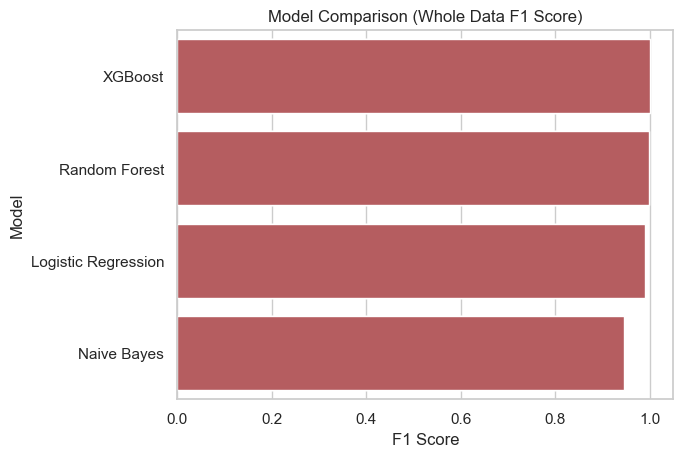

In [98]:
        # "Model": name,
        # "Cross-Validation Accuracy": float(f"{acc_mean:.6f}"),
        # "Cross-Validation Accuracy std": float(f"{acc_std:.6f}"),
        # "Cross-Validation F1 Score": float(f"{f1_mean:.6f}"),
        # "Cross-Validation F1 Score std": float(f"{f1_std:.6f}"),
        # "Test Accuracy": acc,
        # "F1 Score": f1,
        # "Whole data Test Accuracy": whole_acc,
        # "Whole Score": whole_f1
# Compare all models
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df)

# Plot results
sns.barplot(x="F1 Score", y="Model", data=results_df.sort_values(by="F1 Score", ascending=False))
plt.title("Model Comparison (F1 Score)")

# Plot results
sns.barplot(x="Test Accuracy", y="Model", data=results_df.sort_values(by="Test Accuracy", ascending=False))
plt.title("Model Comparison (F1 Score)")
# Plot results
sns.barplot(x="Whole data Test Accuracy", y="Model", data=results_df.sort_values(by="Whole data Test Accuracy", ascending=False))
plt.title("Model Comparison (Whole Data Accuracy)")

# Plot results
sns.barplot(x="Whole Score", y="Model", data=results_df.sort_values(by="Whole Score", ascending=False))
plt.title("Model Comparison (Whole Data F1 Score)")

In [17]:
%pip install datasets


Note: you may need to restart the kernel to use updated packages.


In [18]:
from datasets import Dataset
print(Dataset)


<class 'datasets.arrow_dataset.Dataset'>


In [19]:
%pip uninstall datasets -y
%pip install datasets --upgrade

Found existing installation: datasets 3.6.0
Uninstalling datasets-3.6.0:
  Successfully uninstalled datasets-3.6.0
Note: you may need to restart the kernel to use updated packages.
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
Using cached datasets-3.6.0-py3-none-any.whl (491 kB)
Note: you may need to restart the kernel to use updated packages.


Transform titles using the same vectorizer

In [44]:
val_df

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"
...,...,...,...,...,...
4951,2,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
4952,2,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
4953,2,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
4954,2,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [46]:
val_df['cleaned'] = (val_df['title'] + ' ' + val_df['text']).apply(clean_text)


In [ ]:
train_df

,label,title,text,subject,date,cleaned
33231,0,MUST SEE: House Oversight Committee Releases M...,Crooked lying Hillary,politics,"Aug 16, 2016",must see house oversight committee releases mo...
36761,0,SCALIA FOUND DEAD With ‘Pillow Over Head’ By M...,Justice Scalia appeared to be in good health p...,Government News,"Feb 15, 2016",scalia found dead with ‘pillow over head’ by m...
29035,0,Road Raging Texas ‘Good Guy With A Gun’ Shoot...,A University of North Texas student is in crit...,News,"January 1, 2016",road raging texas ‘good guy with a gun’ shoots...
31791,0,#FireBenStein FOX NEWS’ BEN STEIN Calls Presid...,,politics,"Jan 28, 2017",firebenstein fox news’ ben stein calls preside...
3419,1,Exclusive: Special counsel Mueller to probe ex...,"WASHINGTON (Reuters) - Robert Mueller, the spe...",politicsNews,"June 2, 2017",exclusive special counsel mueller to probe ext...
...,...,...,...,...,...,...
33001,0,RADICAL ANTI-GUN MUSLIM State Senator Who Was ...,"On October 20, 2015, radical Muslim State sena...",politics,"Sep 16, 2016",radical antigun muslim state senator who was a...
13185,1,German police check more suspicious parcels af...,BERLIN (Reuters) - German police on Monday inv...,worldnews,"December 4, 2017",german police check more suspicious parcels af...
1334,1,Mexico will only remain in NAFTA if good for n...,MEXICO CITY (Reuters) - Mexico will only remai...,politicsNews,"October 10, 2017",mexico will only remain in nafta if good for n...
32958,0,TRUMP FALSELY ACCUSED OF ENCOURAGING Police to...,What Trump actually said was: Our police are a...,politics,"Sep 20, 2016",trump falsely accused of encouraging police to...


Cross-Validation Accuracy: 0.9078
Cross-Validation F1 Score: 0.9134
Accuracy: 0.9078 ± 0.0025
F1 Score: 0.9134 ± 0.0022
Test Accuracy: 0.9979
Test F1 Score: 0.9979

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      1.00      1.00      4000

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



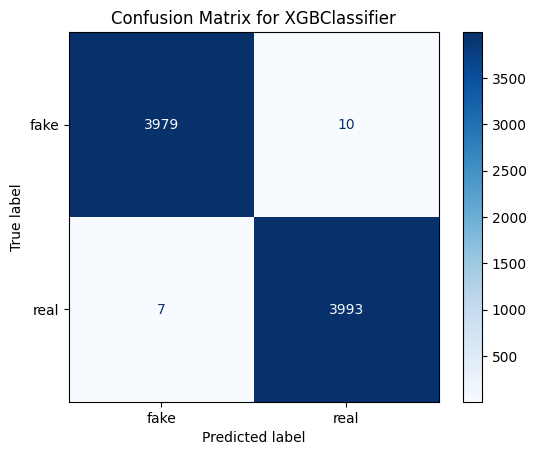

In [53]:
# Use the existing imports for XGBClassifier and Pipeline
from sklearn.model_selection import cross_val_score  # Import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier  # Import XGBClassifier
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

model_XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
# results = []
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),  # TfidfVectorizer is already imported in CELL INDEX 18
    ('clf', model_XGB)
])
    
# # Fit on your training data: texts and labels
# pipe.fit(train_df['cleaned'], train_df['label'])  

# # Cross-validation (5-fold)

# Calculate cross-validation scores using the pipeline (pipe) so text is vectorized
scoring = ['accuracy', 'f1']
scores = cross_validate(pipe, train_df['title'], train_df['label'], cv=5, scoring=scoring)

# Print mean scores
print(f"Cross-Validation Accuracy: {scores['test_accuracy'].mean():.4f}")
print(f"Cross-Validation F1 Score: {scores['test_f1'].mean():.4f}")

# Compute and print mean and std deviation
acc_mean = np.mean(scores['test_accuracy'])
acc_std = np.std(scores['test_accuracy'])
f1_mean = np.mean(scores['test_f1'])
f1_std = np.std(scores['test_f1'])

print(f"Accuracy: {acc_mean:.4f} ± {acc_std:.4f}")
print(f"F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")


# Train on the full training set
pipe.fit(train_df['cleaned'], train_df['label'])

# Predict on the test set
y_pred = pipe.predict(test_df['cleaned'])

# Evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print metrics
print(f"Test Accuracy: {accuracy_score(test_df['label'], y_pred):.4f}")
print(f"Test F1 Score: {f1_score(test_df['label'], y_pred, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(test_df['label'], y_pred))

# Confusion Matrix
cm = confusion_matrix(test_df['label'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for XGBClassifier")
plt.show()

# # Transform the test data using the same TfidfVectorizer
# tfidf = TfidfVectorizer(stop_words='english')
# X_test_tfidf = tfidf.transform(test_df['cleaned'])

# # # # Transform the text data into numerical features using TfidfVectorizer

# # X_train_tfidf = tfidf.fit_transform(train_df['cleaned'])
# # Fit the model and predict on the test set
# # model_XGB.fit(X_train_tfidf, train_df['label'])
# preds = model_XGB.predict(X_test_tfidf)
	
# # Fit and Predict on test set
# pipe.fit(train_df['cleaned'], train_df['label'])
# preds = pipe.predict(test_df['cleaned'])

# # Evaluate
# acc = accuracy_score(test_df['label'], preds)
# f1 = f1_score(test_df['label'], preds, average='weighted')
# print(f"Test Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print(classification_report(test_df['label'], preds))

# # Confusion Matrix
# cm = confusion_matrix(test_df['label'], preds)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
# disp.plot(cmap='Blues')
# plt.title(f"Confusion Matrix for XGBClassifier")
# plt.show()





Transform titles using the same vectorizer

In [54]:
# Transform the validation data using the same TfidfVectorizer
X_val_tfidf = tfidf.transform(val_df['cleaned'])
# Predict labels for validation data
val_preds = model_XGB.predict(X_val_tfidf)
  
# Save predictions in val_df or elsewhere
val_df['predicted_label_model_XGB'] = val_preds
    
val_df

,label,title,text,subject,date,cleaned,predicted_label_model_XGB
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017",uks may receiving regular updates on london tu...,1
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017",uk transport police leading investigation of l...,1
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017",pacific nations crack down on north korean shi...,1
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017",three suspected al qaeda militants killed in y...,1
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017",chinese academics prod beijing to consider nor...,1
...,...,...,...,...,...,...,...
4951,2,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",mcpain john mccain furious that iran treated u...,0
4952,2,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",justice yahoo settles email privacy classactio...,0
4953,2,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",sunnistan us and allied ‘safe zone’ plan to ta...,0
4954,2,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",how to blow million al jazeera america finall...,0


In [55]:
print(val_df['predicted_label_model_XGB'].value_counts())


predicted_label_model_XGB
0    3500
1    1456
Name: count, dtype: int64


Replace label column

In [56]:
val_df['label'] = val_df['predicted_label_model_XGB']



# Save the modified validation file

In [57]:
val_df.to_csv(OUTPUT_PATH, index=False)

print(f"Predicted labels saved to {OUTPUT_PATH}")

Predicted labels saved to dataset/predicted_validation_data_from_XGBoost.csv


Try BERT Again

In [58]:
test_df

,label,title,text,subject,date,cleaned
3775,1,U.S. Senate majority leader urges less drama f...,WASHINGTON (Reuters) - Senate Majority Leader ...,politicsNews,"May 16, 2017",us senate majority leader urges less drama fro...
988,1,"U.S. State Department names Russian defense, i...",WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,"October 27, 2017",us state department names russian defense inte...
39668,0,BREAKING! NEW Wikileaks Email: Confidential Au...,The report exposed in an email shared by Wikil...,left-news,"Nov 6, 2016",breaking new wikileaks email confidential audi...
2161,1,McConnell says all need to stand against hate ...,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"August 16, 2017",mcconnell says all need to stand against hate ...
23039,0,WATCH: Republicans Disrespectfully Shout Down...,Democrats stood up for the American people but...,News,"January 12, 2017",watch republicans disrespectfully shout down e...
...,...,...,...,...,...,...
31825,0,DISGUSTING! Abusive “Transformers” Star Shia L...,"Shia Labeouf maniacally screams ""he will not ...",politics,"Jan 22, 2017",disgusting abusive “transformers” star shia la...
12967,1,Ireland open to adding to border text but cloc...,DUBLIN (Reuters) - Ireland is open to adding t...,worldnews,"December 6, 2017",ireland open to adding to border text but cloc...
20766,0,Republicans Demand Chelsea Clinton Be Questio...,If you thought leaving Congress would somehow ...,News,"July 24, 2017",republicans demand chelsea clinton be question...
38563,0,“I’LL PUT A BULLET IN YOUR HEAD!” Scuffle Brea...,AUSTIN A shoving match and war of words near...,left-news,"May 29, 2017",“i’ll put a bullet in your head” scuffle break...


Predicting: 100%|██████████| 7989/7989 [02:05<00:00, 63.81it/s]


Classification Report:
               precision    recall  f1-score   support

        REAL       0.81      1.00      0.90      3989
        FAKE       0.99      0.77      0.87      4000

    accuracy                           0.88      7989
   macro avg       0.90      0.88      0.88      7989
weighted avg       0.90      0.88      0.88      7989

Accuracy: 0.8837151082738766


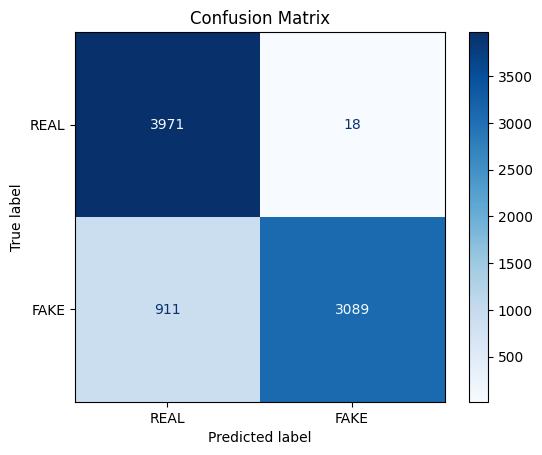

In [59]:
# Imports
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Load model and tokenizer
model_name = "Pulk17/Fake-News-Detection"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example: Your validation DataFrame (replace this with your own)
# val_df = pd.read_csv("validation_data.csv")
# Columns needed: val_df['text'], val_df['label'] (0 for REAL, 1 for FAKE)

# Function to predict a single text
def predict_label(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return torch.argmax(outputs.logits, dim=1).item()

# Predict on all texts
predicted_labels = []
for text in tqdm(test_df['cleaned'], desc="Predicting"):
    predicted_labels.append(predict_label(text))

# Add predictions to DataFrame
test_df['predicted'] = predicted_labels

# Evaluation Metrics
true = test_df['label']
pred = test_df['predicted']

# Classification report
print("\nClassification Report:\n", classification_report(true, pred, target_names=["REAL", "FAKE"]))

# Accuracy
print("Accuracy:", accuracy_score(true, pred))

# Confusion Matrix
cm = confusion_matrix(true, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["REAL", "FAKE"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(true, pred)
f1 = f1_score(true, pred, average='macro')  # 'macro' gives equal weight to both classes

print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Test Accuracy: 0.8837
F1 Score: 0.8823



📊 Model Comparison:
                 Model  Cross-Validation Accuracy  Test Accuracy  F1 Score
0  Logistic Regression                   0.985447       0.983227  0.983227
1          Naive Bayes                   0.935593       0.935662  0.935630
2        Random Forest                   0.987325       0.986982  0.986982
3              XGBoost                   0.996683       0.997872  0.997872
4        BERT (Pulk17)                        NaN       0.883700  0.882300


C:\Users\happy\AppData\Local\Temp\ipykernel_22648\1469248108.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=results_df.sort_values(by="F1 Score", ascending=False), palette="Blues_d")


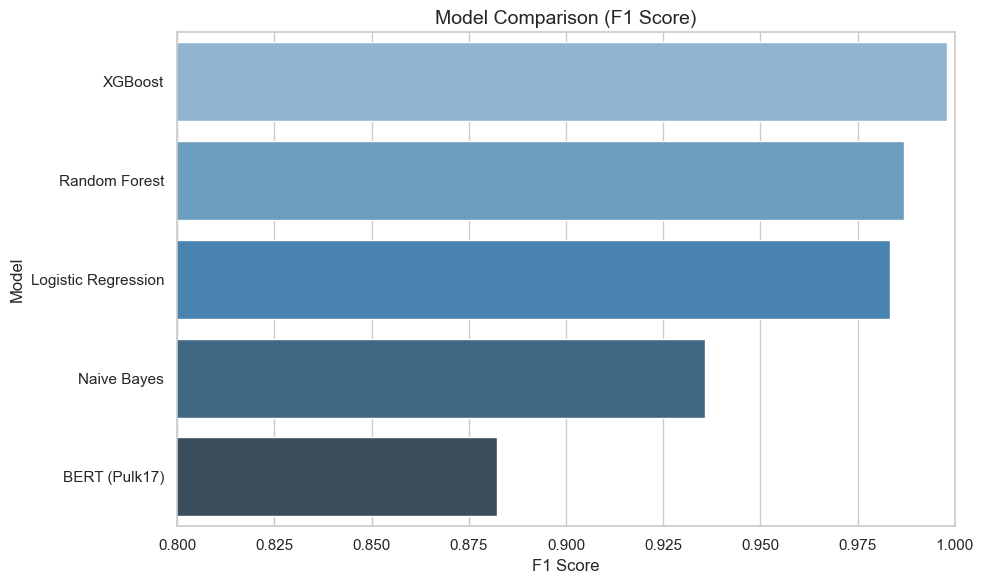

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate the table from the image
results = [
    {"Model": "Logistic Regression", "Cross-Validation Accuracy": 0.985447, "Test Accuracy": 0.983227, "F1 Score": 0.983227},
    {"Model": "Naive Bayes", "Cross-Validation Accuracy": 0.935593, "Test Accuracy": 0.935662, "F1 Score": 0.935630},
    {"Model": "Random Forest", "Cross-Validation Accuracy": 0.987325, "Test Accuracy": 0.986982, "F1 Score": 0.986982},
    {"Model": "XGBoost", "Cross-Validation Accuracy": 0.996683, "Test Accuracy": 0.997872, "F1 Score": 0.997872},
    {"Model": "BERT (Pulk17)", "Cross-Validation Accuracy": None, "Test Accuracy": 0.8837, "F1 Score": 0.8823}
]

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
print(results_df)
# Plot F1 Score Comparison
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="F1 Score", y="Model", data=results_df.sort_values(by="F1 Score", ascending=False), palette="Blues_d")
plt.title("Model Comparison (F1 Score)", fontsize=14)
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0.8, 1.0)
plt.tight_layout()
plt.show()

##Try this new BERT = https://huggingface.co/jy46604790/Fake-News-Bert-Detect in Colab